# Setup & Load Data

In [1]:
from __future__ import unicode_literals
import os
import sys
# sys.path.append('../')
import datetime
import pandas as pd
import numpy as np
import datetime
import matplotlib as mpl
import matplotlib.pylab as plt
import matplotlib.dates as md
import matplotlib.dates as mdates
import random
import seaborn as sns
%matplotlib inline
sys.path.append('../')
from matplotlib import font_manager, rc
from vistools.utils import *
from pytz import timezone
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes, mark_inset, inset_axes

# font setup
font_dirs = ['../']
font_files = font_manager.findSystemFonts(fontpaths=font_dirs)
font_list = font_manager.createFontList(font_files)
font_manager.fontManager.ttflist.extend(font_list)
plt.rcParams['font.family'] = 'Times New Roman'

def read_df(psn, app_name, date_for_timestamp, \
            data_path = '../enertalk-dataset/'):
    psn_date = psn+'/'+date_for_timestamp.replace('-','')+'/'
    app_fname = [fname for fname in os.listdir(data_path+psn_date) if app_name in fname][0]
    df = pd.read_parquet(data_path+psn_date+app_fname)
    df['timestamp'] = pd.to_datetime(df['timestamp'], unit='ms')
    return df


data_path = '../enertalk-dataset/'
fig_width = 8.9
golden_mean = (np.sqrt(5)-1.0)/2.0    # Aesthetic ratio
fig_height = fig_width*golden_mean # height in inches

# Total
psn = '00'
app_name = 'total'
date_for_timestamp = '2016-11-26'
df = read_df(psn, app_name, date_for_timestamp, data_path)
focus_start = date_for_timestamp +' 10:54:30' 
focus_end = date_for_timestamp + ' 10:56:30'

df_15hz = get_specific_duration(df, focus_start, focus_end)
df_15hz['dummy_ts'] = np.linspace(0, 120, num=df_15hz.shape[0])

df_1hz = get_specific_duration(df, focus_start, focus_end)
df_1hz = downsampling_with_first_sample(df_1hz, '1S')
df_1hz['dummy_ts'] = np.linspace(0, 120, num=df_1hz.shape[0])

df_6s = get_specific_duration(df, focus_start, focus_end)
df_6s = downsampling_with_first_sample(df_1hz, '6S')
df_6s['dummy_ts'] = np.linspace(0, 120, num=df_6s.shape[0])

df_total = [df_6s, df_1hz, df_15hz]

# TV
psn = '00'
app_name = 'TV'
date_for_timestamp = '2016-11-23'
df = read_df(psn, app_name, date_for_timestamp, data_path)
# focus_start = date_for_timestamp +' 04:37:30'
# focus_end = date_for_timestamp + ' 04:39:30'
focus_start = date_for_timestamp +' 05:18:30'
focus_end = date_for_timestamp + ' 05:20:30'

df_15hz = get_specific_duration(df, focus_start, focus_end)
df_15hz['dummy_ts'] = np.linspace(0, 120, num=df_15hz.shape[0])

df_1hz = get_specific_duration(df, focus_start, focus_end)
df_1hz = downsampling_with_first_sample(df_1hz, '1S')
df_1hz['dummy_ts'] = np.linspace(0, 120, num=df_1hz.shape[0])

df_6s = get_specific_duration(df, focus_start, focus_end)
df_6s = downsampling_with_first_sample(df_1hz, '6S')
df_6s['dummy_ts'] = np.linspace(0, 120, num=df_6s.shape[0])

df_tv = [df_6s, df_1hz, df_15hz]

# Rice Cooker
psn = '00'
app_name = 'rice-cooker'
date_for_timestamp = '2016-11-26'
df = read_df(psn, app_name, date_for_timestamp, data_path)
focus_start = date_for_timestamp +' 10:55:00' 
focus_end = date_for_timestamp + ' 10:57:00'

df_15hz = get_specific_duration(df, focus_start, focus_end)
df_15hz['dummy_ts'] = np.linspace(0, 120, num=df_15hz.shape[0])

df_1hz = get_specific_duration(df, focus_start, focus_end)
df_1hz = downsampling_with_first_sample(df_1hz, '1S')
df_1hz['dummy_ts'] = np.linspace(0, 120, num=df_1hz.shape[0])

df_6s = get_specific_duration(df, focus_start, focus_end)
df_6s = downsampling_with_first_sample(df_1hz, '6S')
df_6s['dummy_ts'] = np.linspace(0, 120, num=df_6s.shape[0])

df_cooker = [df_6s, df_1hz, df_15hz]

# Washing Machine
psn = '00'
app_name = 'washing-machine'
date_for_timestamp = '2016-11-23'
df = read_df(psn, app_name, date_for_timestamp, data_path)
focus_start = date_for_timestamp +' 01:07:10' 
focus_end = date_for_timestamp + ' 01:09:10'

df_15hz = get_specific_duration(df, focus_start, focus_end)
df_15hz['dummy_ts'] = np.linspace(0, 120, num=df_15hz.shape[0])

df_1hz = get_specific_duration(df, focus_start, focus_end)
df_1hz = downsampling_with_first_sample(df_1hz, '1S')
df_1hz['dummy_ts'] = np.linspace(0, 120, num=df_1hz.shape[0])

df_6s = get_specific_duration(df, focus_start, focus_end)
df_6s = downsampling_with_first_sample(df_1hz, '6S')
df_6s['dummy_ts'] = np.linspace(0, 120, num=df_6s.shape[0])

df_washer = [df_6s, df_1hz, df_15hz]

# collection
df_all = {}
df_all['total'] = df_total
df_all['TV'] = df_tv
df_all['rice-cooker'] = df_cooker
df_all['washing-machine'] = df_washer


### Visualize Figure 7. Plots of power consumption measurements for sampling rate of 1/6 Hz, 1 Hz, 15 Hz.

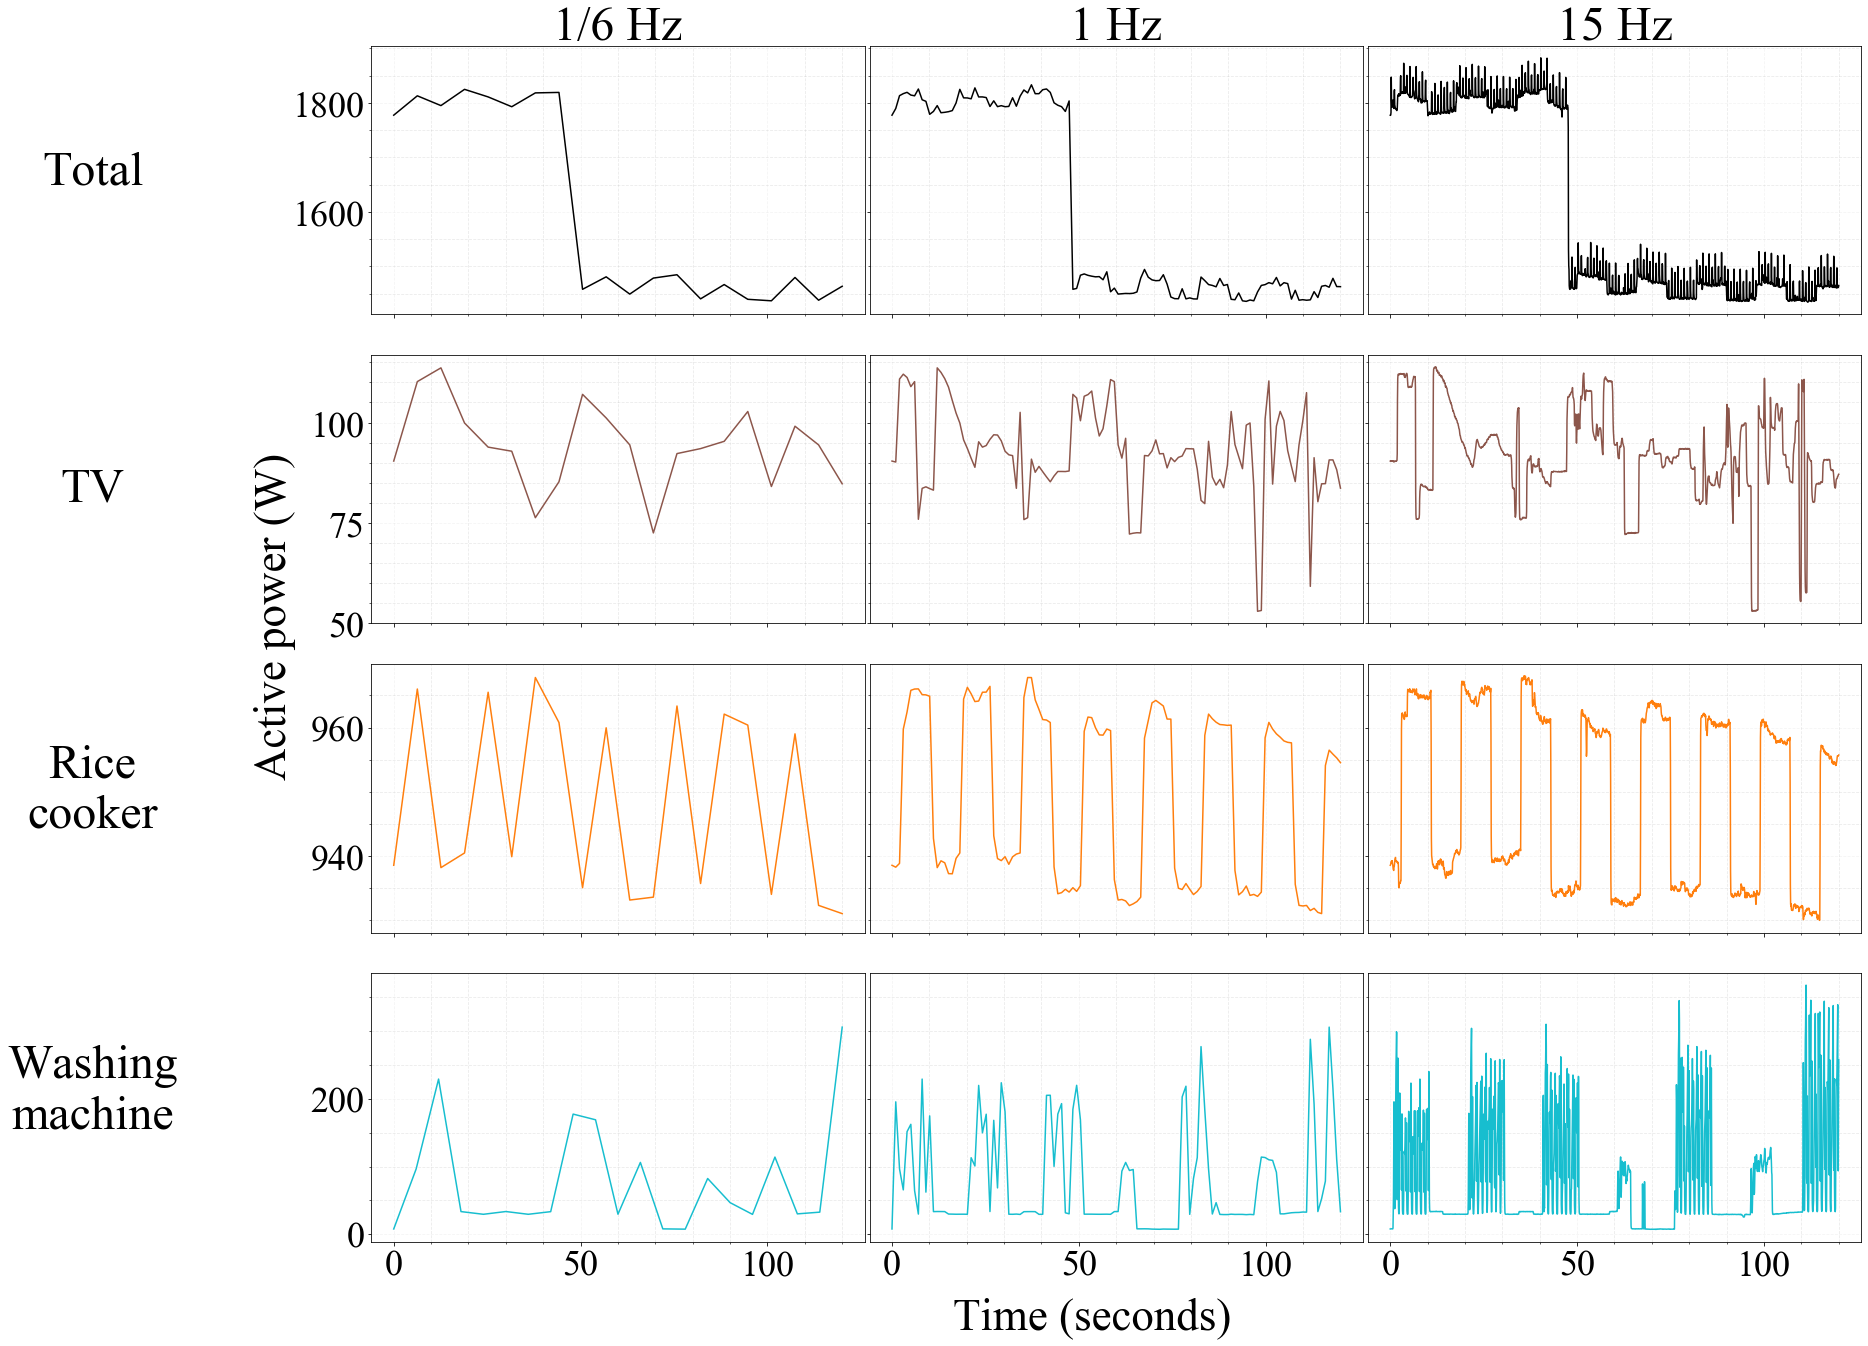

In [2]:
overall_fontsize = 45
big_fontsize = 48
nice_fonts = {
        "text.usetex": False,
        "axes.labelsize": overall_fontsize,
        "font.size": overall_fontsize,
        "legend.fontsize": overall_fontsize,
        "xtick.labelsize": overall_fontsize,
        "ytick.labelsize": overall_fontsize,
        "font.family": 'Times New Roman'
}

mpl.rcParams.update(nice_fonts)

fig, axs = plt.subplots(4, 3, figsize = (fig_width*3, fig_height*4), sharex='col', sharey='row')
fig.subplots_adjust(wspace=0.01, hspace=0.15)

for i, app_name in enumerate(['total', 'TV', 'rice-cooker', 'washing-machine']):
    df_app = df_all[app_name]
    ax_row = axs[i]
    app_color = get_app_color(app_name)
    col = 0
    for ax, df_target in zip(ax_row, df_app):
        
            

        ax.plot(df_target['dummy_ts'], df_target['active_power'], color = app_color)
        ax.grid(b=True, which='major', color='#999999', linestyle='--', alpha = 0.1)
        ax.minorticks_on()
        ax.grid(b=True, which='minor', color='#999999', linestyle='--', alpha=0.2)
        
        # set title
        if app_name == 'total':
            if col == 0:
                ax.set_title('1/6 Hz',fontsize = big_fontsize)
            elif col == 1:
                ax.set_title('1 Hz', fontsize = big_fontsize)
            elif col == 2:
                ax.set_title('15 Hz', fontsize = big_fontsize)
            else:
                raise Exception('Invalid input' + str(col))
        
            
        ax.xaxis.set_tick_params(labelsize=overall_fontsize*0.8)
        ax.yaxis.set_tick_params(labelsize=overall_fontsize*0.8)
        col += 1
        
fig.text(0.5, 0.07, 'Time (seconds)', ha='center', fontsize=overall_fontsize)
fig.text(0.075, 0.52, 'Active power (W)', ha='center', va='center', rotation='vertical', fontsize=overall_fontsize)

app_alpha = 1
fig.text(-0.02, 0.8, 'Total', ha='center', va='center', weight='extra bold', fontsize = big_fontsize)
fig.text(-0.02, 0.6, 'TV', ha='center', va='center', weight='extra bold', fontsize = big_fontsize)
fig.text(-0.02, 0.41, 'Rice\ncooker', ha='center', va='center', weight='extra bold', fontsize = big_fontsize)
fig.text(-0.02, 0.22, 'Washing\nmachine', ha='center', va='center', fontweight=1000, fontsize = big_fontsize)
fig.show()
fig.savefig('../plots/resolution_comparison.pdf', bbox_inches='tight', format='pdf', dpi=1000)